<a href="https://colab.research.google.com/github/silviajlb/BMW-project/blob/main/preprocessing_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación de datos y librerías

In [1207]:
# Datos
import pandas as pd
import numpy as np

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import MinMaxScaler

In [1208]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1209]:
df_bmw = pd.read_csv("/content/drive/MyDrive/Nuclio/M3. Data Analytics y Business Intelligence/Entregable 1/bmw_pricing_v3.csv")

In [1210]:
df_bmw.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [1211]:
#podemos ver que no tenemos filas duplicadas
df_bmw[df_bmw.duplicated(keep = False)]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


Muevo la columna precio al princpio de todo para verla claramente

In [1212]:
nuevas_columnas = ['precio'] + [col for col in df_bmw.columns if col != 'precio']
df_bmw = df_bmw[nuevas_columnas]
df_bmw.head()

,precio,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,fecha_venta
0,11300.0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,2018-01-01
1,69700.0,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,2018-02-01
2,10200.0,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,2018-02-01
3,25100.0,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,2018-02-01
4,33400.0,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,2018-04-01


# Paso 1. Columnas eliminadas
¿Qué columnas eliminaron inicialmente del dataset y por qué?


> *R: Inicialmente podemos ver que hay una columna llamada 'marca' que no tiene mucho sentido ya que la base de datos es de la marca BMW, por si acaso vemos los valores que se encuentran dentro, y efectivamente solo existe un tipo de dato llamado 'bmw' así que la eliminamos*



In [1213]:
#La columna 'marca' no tiene sentido ya que la base de datos es de BMW, pero para asegurarnos haremos la siguiente función
df_bmw['marca'].value_counts()

BMW    3873
Name: marca, dtype: int64

In [1214]:
del df_bmw['marca']

# Paso 2 Nulos

Manejo de nulos, explicar qué se hizo con los nulos por cada columna

Nota: Como tenemos un df muy pequeño intentaremos no eliminar filas en lo medida de lo posible

>*Pimero he eliminado las filas con nulos en el precio ya que no tenía ningún sentido tener nulos en la variable que queremos predecir.
Lo segundo que he hecho ha sido eliminar una columna con un 70% de nulos ya que me parecía un número muy alto de nulos como para inventarmelo.
Una vez hecho esto en la columna 'modelo' he rellenado los nulos haciendo la moda. He comenzado rellenando los nulos de esta columna porque el resto de columnas las rellenaré haciendo una moda pero agrupando por 'modelo'.
Por último me han quedado 5 nulos en df sin rellenar bien, esto se debe a que no todos los grupos de modelos tenian modas en todas las columnas. Así que he aplicado una moda de la columna sin agrupar nada.*



In [1215]:
df_bmw1 = df_bmw.copy()

In [1216]:
df_bmw1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   precio                       4837 non-null   float64
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [1217]:
#Vemos el porcentaje de nulos que hay en cada columna
df_bmw1.isnull().sum() / len(df_bmw) * 100

precio                          0.123890
modelo                          0.061945
km                              0.041297
potencia                        0.020648
fecha_registro                 50.030973
tipo_gasolina                   0.103242
color                           9.188520
tipo_coche                     30.146603
volante_regulable               0.082593
aire_acondicionado             10.035102
camara_trasera                  0.041297
asientos_traseros_plegables    70.018584
elevalunas_electrico            0.041297
bluetooth                      15.032005
gps                             0.000000
alerta_lim_velocidad           15.032005
fecha_venta                     0.020648
dtype: float64

Nulos en el target

In [1218]:
# En precio tenemos muy pocos nulos, además como es el valor que queremos predecir no podemos inventarnoslo, eliminaremos los nulos
df_bmw1.dropna(axis=0, subset=['precio'], inplace=True)

In [1219]:
df_bmw1['precio'].isnull().sum()

0

Nulos que forman un 70% de los datos

In [1220]:
del df_bmw1['asientos_traseros_plegables']

Nulos en modelo

In [1221]:
df_bmw1['modelo'].fillna(df_bmw1['modelo'].mode()[0], inplace = True)

In [1222]:
df_bmw1['modelo'].isnull().sum()

0

Nulos en float

In [1223]:
l_float = list(df_bmw1.select_dtypes(include='float').columns)
print('Variables numéricas:', l_float)

Variables numéricas: ['precio', 'km', 'potencia']


In [1224]:
# hacemos la moda agrupando por el modelo para que sea más preciso

for col in l_float:
  df_bmw1[col].fillna(df_bmw1.groupby('modelo')[col].mean()[0], inplace = True)

In [1225]:
#Comprobamos
df_bmw1.isnull().sum()

precio                     0
modelo                     0
km                         0
potencia                   0
fecha_registro          2418
tipo_gasolina              5
color                    444
tipo_coche              1458
volante_regulable          4
aire_acondicionado       485
camara_trasera             2
elevalunas_electrico       2
bluetooth                728
gps                        0
alerta_lim_velocidad     728
fecha_venta                1
dtype: int64

Nulos en fechas

In [1226]:
# transformamos las columnas a datetime
df_bmw1['fecha_venta'] = pd.to_datetime(df_bmw1['fecha_venta'], format='%Y-%m-%d')
df_bmw1['fecha_registro'] = pd.to_datetime(df_bmw1['fecha_registro'], format='%Y-%m-%d')

In [1227]:
moda_fecha = df_bmw1['fecha_venta'].mode().iloc[0] if not df_bmw1['fecha_venta'].mode().empty else None
df_bmw1['fecha_venta'].fillna(moda_fecha, inplace = True)

In [1228]:
df_bmw1['fecha_venta'].isnull().sum()

0

In [1229]:
moda_fecha = df_bmw1['fecha_registro'].mode().iloc[0] if not df_bmw1['fecha_registro'].mode().empty else None
df_bmw1['fecha_registro'].fillna(moda_fecha, inplace = True)

In [1230]:
df_bmw1['fecha_registro'].isnull().sum()

0

Nulos en categoricas

In [1231]:
l_categ = list(df_bmw1.select_dtypes(include='object').columns) # creo una lista con los categoricos
l_categ.remove('modelo')  #elimino modelo de la lista porque haremos la moda haciendo un groupby por modelo
l_categ

['tipo_gasolina',
 'color',
 'tipo_coche',
 'volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'elevalunas_electrico',
 'bluetooth',
 'alerta_lim_velocidad']

In [1232]:
# Itera sobre las columnas categóricas y rellena los nulos con la moda agrupando por 'modelo'
for col in l_categ:
    # Calcula la moda agrupando por 'modelo' y selecciona el primer valor
    moda_por_grupo = df_bmw1.groupby('modelo')[col].apply(lambda x: x.mode()[0] if not x.mode().empty else None)

    # Usa el método transform para asignar la moda adecuada a cada fila según su grupo 'modelo'
    df_bmw1[col] = df_bmw1[col].fillna(df_bmw1['modelo'].map(moda_por_grupo))


In [1233]:
df_bmw1.isnull().sum().sum()

5

Nulos en categóricos que no se pueden agrupar por modelo

In [1234]:
# lista de los categoricos que aun tienen nulos

In [1235]:
df_bmw1.isnull().sum()  # como el problema es que al hacer un groupby no se ha podido aplicar la moda, haremos la moda sin aplicar el grouby

precio                  0
modelo                  0
km                      0
potencia                0
fecha_registro          0
tipo_gasolina           0
color                   1
tipo_coche              0
volante_regulable       0
aire_acondicionado      2
camara_trasera          0
elevalunas_electrico    0
bluetooth               1
gps                     0
alerta_lim_velocidad    1
fecha_venta             0
dtype: int64

In [1236]:
cols_null = list(df_bmw1.columns[df_bmw1.isna().sum() > 0])
cols_null

['color', 'aire_acondicionado', 'bluetooth', 'alerta_lim_velocidad']

In [1237]:
for col in cols_null:
  df_bmw1[col].fillna(df_bmw1[col].mode()[0], inplace = True)

In [1238]:
df_bmw1.isnull().sum().sum()

0

# Paso 3 Análisis univariable

Análisis univariable, explicar alguna información interesante encontrada


> Lo primero que he hecho ha sido crear una nueva columna llamada dias_antiguedad y he elliminado las dos columnas de fechas con las que la he formado


> R: categóricas1. En modelo, tipo_gasolina y color hay valores que se repiten poco, los agruparemos en 'otros'
2. tipo_coche la dejaré como está
3. fecha_venta eliminaremos la columna ya que solo hay 4 ventas que no suceden en 2018

> R: boleanas
1. En bool_gpsel 93% de los valores son F solo un 7% son T. Podemos eliminar esta columna.
2. El resto de datos me parecen suficientemente representativos

> R: numéricas
1. En la columna 'km' hemos encontrado outliers por encima del valor 0.4e+06, los hemos sustituido por la mediana(calculada sin outliers)
2. En potencia he encontrado muchos outliers por encima de 200 pero considero que eliminarlos afectaría al modelo, ya que si es posible que un coche tenga 300CV de potencia. Y en el caso de tener esa potencia, tendría sentido que exisitiese una relación con el precioEn potencia he encontrado otros por debajo de 50 y unos cuantos más por encima de 200 los cuales he sustituido por la mediana

In [1239]:
df_bmw2 = df_bmw1.copy()

In [1240]:
df_bmw2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4837 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   precio                4837 non-null   float64       
 1   modelo                4837 non-null   object        
 2   km                    4837 non-null   float64       
 3   potencia              4837 non-null   float64       
 4   fecha_registro        4837 non-null   datetime64[ns]
 5   tipo_gasolina         4837 non-null   object        
 6   color                 4837 non-null   object        
 7   tipo_coche            4837 non-null   object        
 8   volante_regulable     4837 non-null   bool          
 9   aire_acondicionado    4837 non-null   bool          
 10  camara_trasera        4837 non-null   bool          
 11  elevalunas_electrico  4837 non-null   bool          
 12  bluetooth             4837 non-null   bool          
 13  gps               

## Creamos la columna 'dias_antiguedad'

In [1241]:
df_bmw2['dias_antiguedad'] = df_bmw2['fecha_venta'] - df_bmw2['fecha_registro']

In [1242]:
del df_bmw2['fecha_venta']
del df_bmw2['fecha_registro']

In [1243]:
# comprobamos
df_bmw2.head()

,precio,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,dias_antiguedad
0,11300.0,118,140411.0,100.0,diesel,black,hatchback,True,True,False,True,False,True,False,2161 days
1,69700.0,M4,13929.0,317.0,petrol,grey,convertible,True,True,False,False,True,True,True,1676 days
2,10200.0,320,183297.0,120.0,diesel,white,estate,False,False,False,True,False,True,False,2132 days
3,25100.0,420,128035.0,135.0,diesel,red,convertible,True,True,False,True,True,True,True,1676 days
4,33400.0,425,97097.0,160.0,diesel,silver,coupe,True,True,False,False,True,True,True,1735 days


In [1244]:
# Lo pasamos a int
df_bmw2['dias_antiguedad'] = pd.to_timedelta(df_bmw2['dias_antiguedad']).dt.days.astype(int)

In [1245]:
df_bmw2.head()

,precio,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,dias_antiguedad
0,11300.0,118,140411.0,100.0,diesel,black,hatchback,True,True,False,True,False,True,False,2161
1,69700.0,M4,13929.0,317.0,petrol,grey,convertible,True,True,False,False,True,True,True,1676
2,10200.0,320,183297.0,120.0,diesel,white,estate,False,False,False,True,False,True,False,2132
3,25100.0,420,128035.0,135.0,diesel,red,convertible,True,True,False,True,True,True,True,1676
4,33400.0,425,97097.0,160.0,diesel,silver,coupe,True,True,False,False,True,True,True,1735


## Dividimos los tipos de datos en listas


In [1246]:
df_bmw3 = df_bmw2.copy()

In [1247]:
lista_kind=['i','f', 'u', 'b']

In [1248]:
target = ['precio']

def obtener_lista_variables(dataset):
  lista_num = []
  lista_bool = []
  lista_cat = []

  for i in dataset:
    if (dataset[i].dtype.kind in lista_kind) and \
    len(dataset[i].unique()) > 2 and i not in target:
      lista_num.append(i)

    elif (dataset[i].dtype.kind in lista_kind) and \
    len(dataset[i].unique()) == 2 and i not in target:
      lista_bool.append(i)

    elif (dataset[i].dtype.kind == 'O') and i not in target:
      lista_cat.append(i)

  return lista_num, lista_bool, lista_cat

In [1249]:
l_num, l_bool, l_cat = obtener_lista_variables(df_bmw3)

In [1250]:
l_num

['km', 'potencia', 'dias_antiguedad']

In [1251]:
l_bool

['volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'elevalunas_electrico',
 'bluetooth',
 'gps',
 'alerta_lim_velocidad']

In [1252]:
l_cat

['modelo', 'tipo_gasolina', 'color', 'tipo_coche']

##Datos categóricos

> 1. ***En modelo*** he agrupado los modelos que se repiten menos de 10 veces en 'otros modelos'
2. ***tipo_gasolina*** he encontrado dos valores que significan lo mismo pero tienen diferente string 'diesel' y 'Diesel' así que los he juntado



In [1253]:
df_bmw4 = df_bmw3.copy()

In [1254]:
for i in l_cat:
  print(i, df_bmw4[i].value_counts(), '\n')

modelo 320                  753
520                  632
318                  567
X3                   438
116                  358
X1                   274
316                  234
X5                   231
525                  184
530                  157
118                  143
318 Gran Turismo      97
320 Gran Turismo      73
518                   66
X4                    46
535                   46
X6                    44
420                   43
120                   36
420 Gran Coupé        33
330                   33
730                   33
520 Gran Turismo      23
325                   19
640 Gran Coupé        19
740                   18
530 Gran Turismo      18
X5 M                  17
114                   15
218 Active Tourer     13
M550                  12
218                   12
218 Gran Tourer        9
640                    8
418 Gran Coupé         8
X6 M                   8
M3                     7
335                    7
435 Gran Coupé         6
Z4                

**modelo**

In [1255]:
pd.set_option("display.max_rows", None)  #usamos esta función para que nos aparezca la lista completa

df_bmw4['modelo'].value_counts()

320                  753
520                  632
318                  567
X3                   438
116                  358
X1                   274
316                  234
X5                   231
525                  184
530                  157
118                  143
318 Gran Turismo      97
320 Gran Turismo      73
518                   66
X4                    46
535                   46
X6                    44
420                   43
120                   36
420 Gran Coupé        33
330                   33
730                   33
520 Gran Turismo      23
325                   19
640 Gran Coupé        19
740                   18
530 Gran Turismo      18
X5 M                  17
114                   15
218 Active Tourer     13
M550                  12
218                   12
218 Gran Tourer        9
640                    8
418 Gran Coupé         8
X6 M                   8
M3                     7
335                    7
435 Gran Coupé         6
Z4                     6


In [1256]:
conteo_valores = df_bmw4['modelo'].value_counts()

In [1257]:
#seleccionamos solo los valores que se repiten menos de 10 veces

valores_menos_10veces = conteo_valores[conteo_valores < 10]

In [1258]:
# Cambiamos los valores que aparezcan menos de 10 veces por 'otros_modelos'

df_bmw4['modelo'] = df_bmw4['modelo'].apply(lambda x: 'otros_modelos' if x in valores_menos_10veces else x)

**Tipo gasolina**

In [1259]:
# Diesel tiene dos nombres uno con mayúscula y otro con minúscula

df_bmw4['tipo_gasolina'] = np.where(df_bmw4['tipo_gasolina'] == 'Diesel',
                                    'diesel',  df_bmw4['tipo_gasolina'])

In [1260]:
df_bmw4['tipo_gasolina'].unique()

array(['diesel', 'petrol', 'hybrid_petrol', 'electro'], dtype=object)

##Datos bool


> 1. ***En bool_gps*** el 93% de los valores son F solo un 7% son T. Podemos eliminar esta columna.
2. El resto de datos me parecen suficientemente representativos

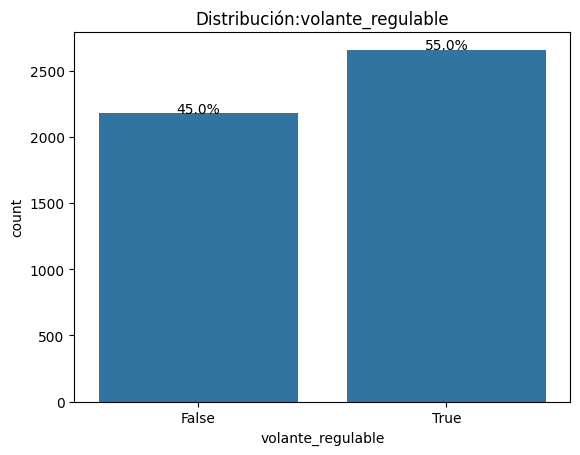

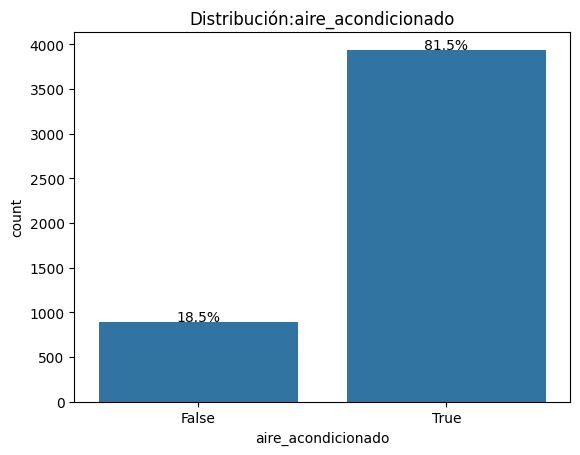

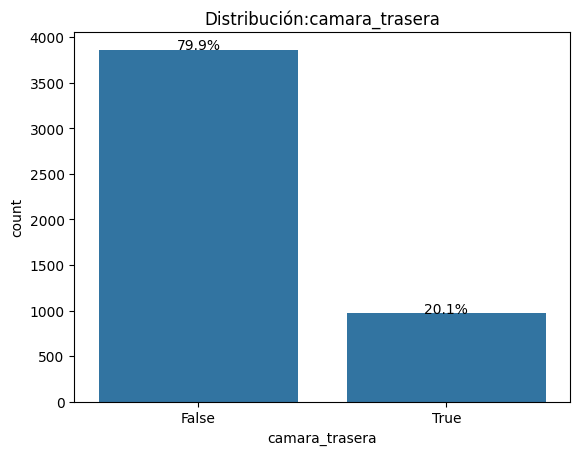

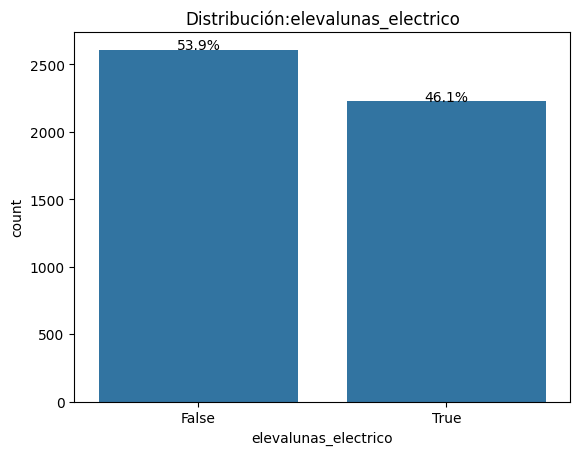

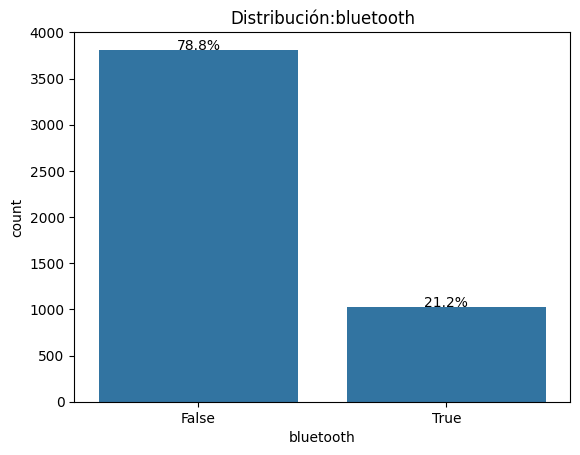

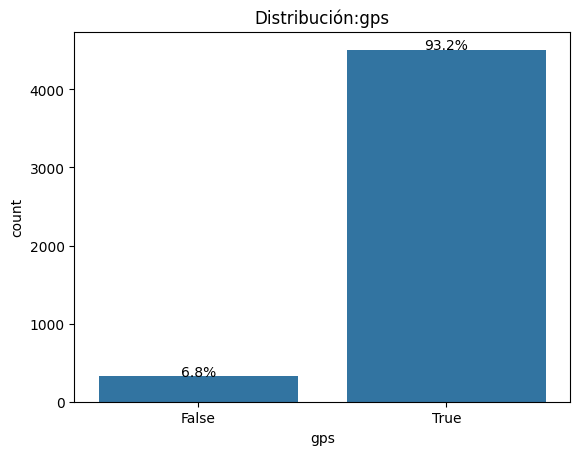

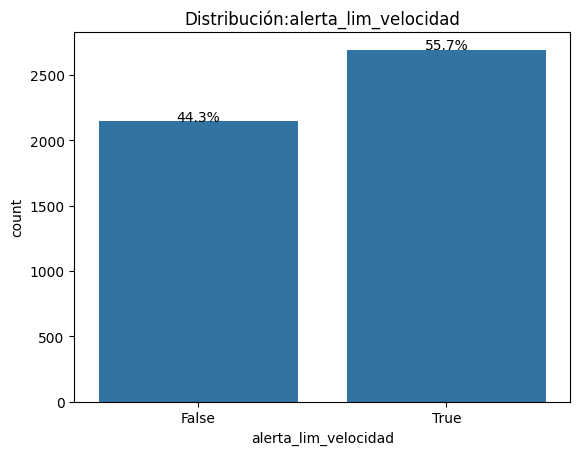

In [1261]:
for i in l_bool:
  ax = sns.countplot(x=i, data=df_bmw4)

  total = len(df_bmw4[i])
  for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height() + 0.02
        ax.annotate(percentage, (x, y), ha='center')

  plt.title('Distribución:'+ i)
  plt.show()

**Gps**

In [1262]:
del df_bmw4['gps']

In [1263]:
df_bmw4.head()

,precio,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,dias_antiguedad
0,11300.0,118,140411.0,100.0,diesel,black,hatchback,True,True,False,True,False,False,2161
1,69700.0,otros_modelos,13929.0,317.0,petrol,grey,convertible,True,True,False,False,True,True,1676
2,10200.0,320,183297.0,120.0,diesel,white,estate,False,False,False,True,False,False,2132
3,25100.0,420,128035.0,135.0,diesel,red,convertible,True,True,False,True,True,True,1676
4,33400.0,otros_modelos,97097.0,160.0,diesel,silver,coupe,True,True,False,False,True,True,1735


##Datos numéricos


> 1. ***En la columna 'km'*** hemos encontrado outliers por encima del valor 0.4e+06, los hemos sustituido por la mediana(calculada sin outliers)
2. ***En potencia*** he encontrado muchos outliers por encima de 200 pero considero que eliminarlos afectaría al modelo, ya que si es posible que un coche tenga 300CV de potencia. Y en el caso de tener esa potencia, tendría sentido que exisitiese una relación con el precio



In [1264]:
df_bmw2.describe().T

,count,mean,std,min,25%,50%,75%,max
precio,4837.0,15831.920612,9222.630708,100.0,10800.0,14200.0,18600.0,178500.0
km,4837.0,140928.088691,60237.754415,-64.0,102758.0,141063.0,175235.0,1000376.0
potencia,4837.0,128.989043,39.009364,0.0,100.0,120.0,135.0,423.0
dias_antiguedad,4837.0,1863.991110,666.526066,-2161.0,1676.0,1765.0,1857.0,10258.0


[[<Axes: title={'center': 'km'}>]]
[[<Axes: title={'center': 'potencia'}>]]
[[<Axes: title={'center': 'dias_antiguedad'}>]]


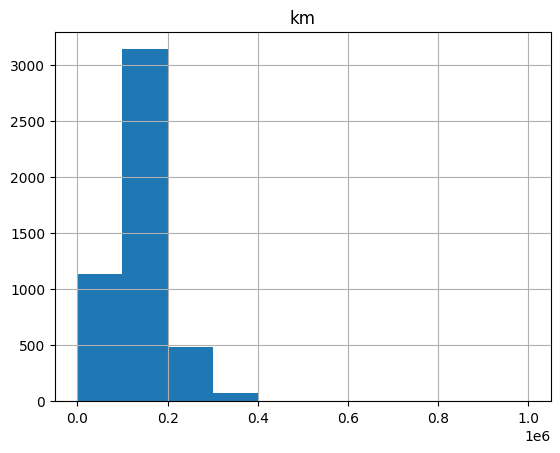

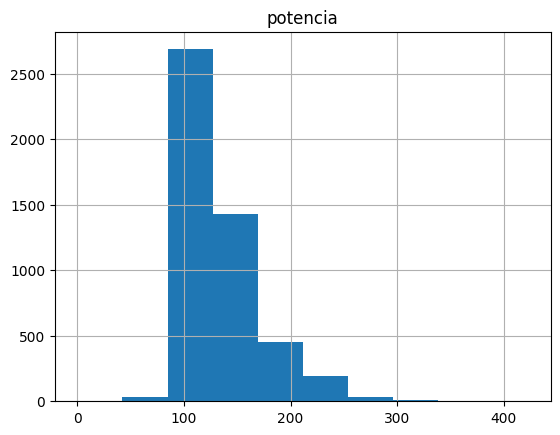

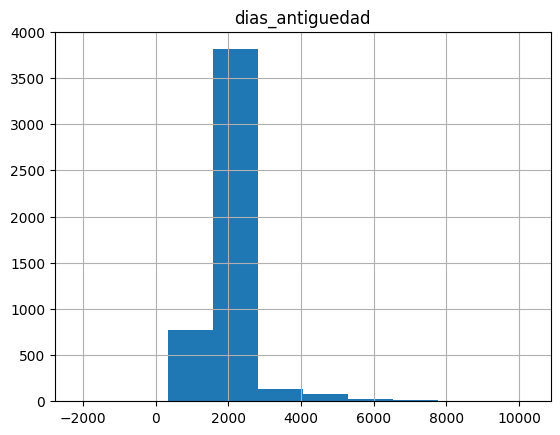

In [1265]:
for i in l_num:
    print(df_bmw4.hist(i))

**km**


<Axes: xlabel='km'>

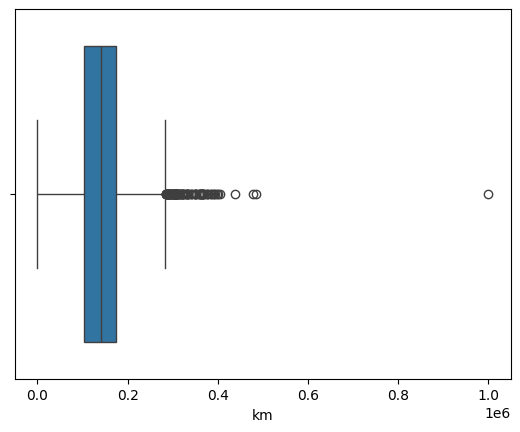

In [1266]:
sns.boxplot(x=df_bmw4['km'])

In [1267]:
df_bmw4[df_bmw4['km'] > (0.4e+06)]
# Vemos que los 'outliers' tienen sentido
# ya que son coche con muchos km (más de lo normal) y justamente son coches mucho más baratos

,precio,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,dias_antiguedad
557,8300.0,520,484615.0,120.0,diesel,blue,estate,True,True,False,False,False,False,2585
1573,1800.0,320,400654.0,110.0,diesel,black,estate,False,False,True,False,False,False,4230
2350,1200.0,318,477571.0,85.0,diesel,grey,estate,False,True,False,False,True,False,1826
2829,100.0,525,439060.0,105.0,diesel,silver,estate,False,False,True,False,False,False,1704
3198,500.0,320,405816.0,100.0,diesel,blue,sedan,False,False,False,False,False,False,6664
3732,1400.0,118,1000376.0,90.0,diesel,black,hatchback,True,False,False,False,False,False,4840


**Potencia**

<Axes: xlabel='potencia'>

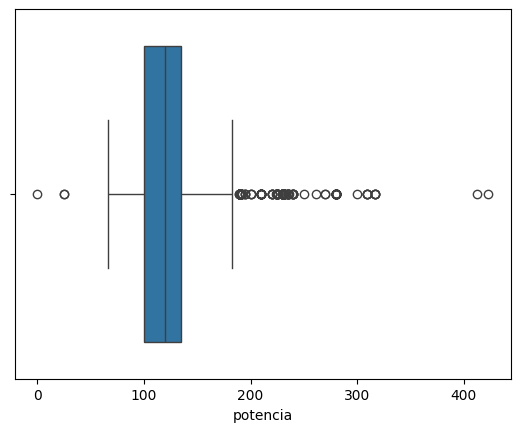

In [1268]:
sns.boxplot(x=df_bmw4['potencia'])

In [1269]:
df_bmw4.precio.min()

100.0

In [1270]:
df_bmw4[df_bmw4['potencia'] < 50]
# si parecen outliers, los eliminaremos

,precio,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,dias_antiguedad
1796,20300.0,otros_modelos,152328.0,25.0,hybrid_petrol,black,hatchback,False,True,False,False,False,True,1735
1925,15500.0,otros_modelos,152470.0,25.0,hybrid_petrol,black,hatchback,False,True,False,False,False,True,1704
3765,11700.0,X1,81770.0,0.0,diesel,white,suv,False,False,False,False,False,False,1247


In [1271]:
# Aunque parece que por encima de 200 ya encontramos outliers, lo cierto es que si es posible que lleguen a esa potencia
# No los eliminaremos

df_bmw4[df_bmw4['potencia'] > 300]

,precio,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,dias_antiguedad
1,69700.0,otros_modelos,13929.0,317.0,petrol,grey,convertible,True,True,False,False,True,True,1676
67,47000.0,otros_modelos,29925.0,309.0,petrol,silver,coupe,True,True,False,True,True,True,1735
72,53600.0,otros_modelos,69410.0,317.0,petrol,white,convertible,True,True,False,False,True,True,1124
73,28000.0,otros_modelos,170550.0,309.0,petrol,grey,coupe,True,True,False,True,False,True,1704
93,28600.0,otros_modelos,99283.0,309.0,petrol,silver,coupe,False,False,False,True,False,True,1735
139,35700.0,otros_modelos,169970.0,309.0,petrol,grey,coupe,True,True,False,True,False,True,2710
2944,51200.0,otros_modelos,33670.0,317.0,petrol,blue,sedan,True,True,False,False,True,True,1492
3092,52400.0,otros_modelos,39250.0,317.0,petrol,black,sedan,True,True,False,False,True,True,912
3601,41600.0,otros_modelos,150187.0,412.0,petrol,white,sedan,True,True,True,True,True,True,1888
4146,82400.0,otros_modelos,2970.0,423.0,petrol,red,suv,True,True,True,False,False,True,730


In [1272]:
#Cremos un df sin incluir los outliers para hacer una mediana más precisa

df_sin_outliers = df_bmw4[df_bmw4['potencia']>=50]

In [1273]:
#Sustituimos los outliers por la mediana del df sin outliers

df_bmw4['potencia'] = np.where((df_bmw4['potencia']<50),
                         df_sin_outliers['potencia'].median(),
                         df_bmw4['potencia'])

# Paso 4 Análisis de correlación

Análisis de correlación inicial, ¿Hay alguna variable correlacionada?


> 1. Potencia: tiene un 0.64 de correlación con el precio.
2. Alerta límite de velocidad: 0.43 de corr con el precio.



In [1274]:
corr = df_bmw4.corr(numeric_only = True)

In [1275]:
corr.style.background_gradient(cmap='Oranges')

,precio,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,dias_antiguedad
precio,1.000000,-0.410252,0.640762,0.269155,0.225764,0.251661,0.262155,0.200342,0.432716,-0.298518
km,-0.410252,1.000000,-0.051520,0.064748,0.015019,0.001371,0.045405,-0.035772,-0.023715,0.325591
potencia,0.640762,-0.051520,1.000000,0.327294,0.181552,0.313503,0.342040,0.227938,0.506726,-0.064889
volante_regulable,0.269155,0.064748,0.327294,1.000000,0.285968,0.254661,0.278169,0.133550,0.244376,0.047122
aire_acondicionado,0.225764,0.015019,0.181552,0.285968,1.000000,0.141225,0.256993,0.103803,0.205516,-0.136418
camara_trasera,0.251661,0.001371,0.313503,0.254661,0.141225,1.000000,0.198955,0.133520,0.195855,0.019411
elevalunas_electrico,0.262155,0.045405,0.342040,0.278169,0.256993,0.198955,1.000000,0.237916,0.336946,-0.066471
bluetooth,0.200342,-0.035772,0.227938,0.133550,0.103803,0.133520,0.237916,1.000000,0.097685,-0.047129
alerta_lim_velocidad,0.432716,-0.023715,0.506726,0.244376,0.205516,0.195855,0.336946,0.097685,1.000000,-0.093764
dias_antiguedad,-0.298518,0.325591,-0.064889,0.047122,-0.136418,0.019411,-0.066471,-0.047129,-0.093764,1.000000


# Paso 5 Análisis variable

Análisis variable vs target, ¿Hay algún insight interesante?

>1. **Km y dias_antiguedad:** Se puede ver claramente una relación inversamente proporcinal. Cuantos más km tiene o más antigüo es, menor es el precio
2. **Potencia:** También vemos como a medida que la potencia sube el precio también aunque es menos evidente que el caso anterior


## Análisis target

Parece que hay muchos outliers pero no los eliminaremos ya que en realidad tienen sentido, es posible que simplemente hayan datos de coches más caros, pero a la hora de predecir pueden sernos útiles

In [1276]:
df_bmw5 = df_bmw4.copy()

In [1277]:
df_bmw5['precio'].describe()

count      4837.000000
mean      15831.920612
std        9222.630708
min         100.000000
25%       10800.000000
50%       14200.000000
75%       18600.000000
max      178500.000000
Name: precio, dtype: float64

<Axes: >

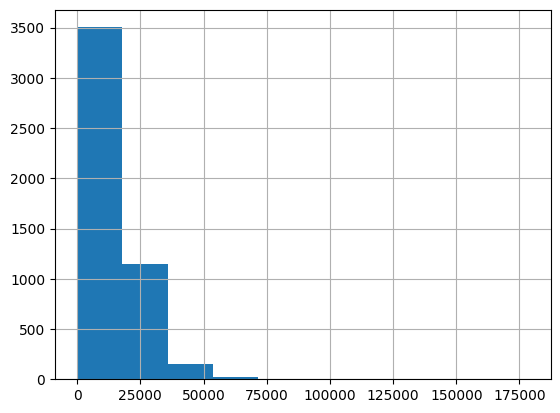

In [1278]:
df_bmw5['precio'].hist()

<Axes: xlabel='precio'>

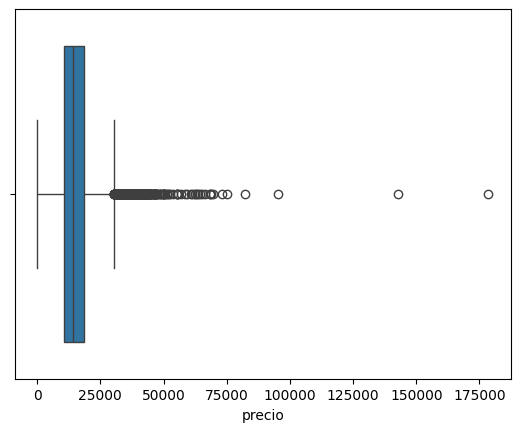

In [1279]:
# Aunque nos salga que los precios entre 30000 y 180000 son outliers, considero que son precios posibles para una coche
# no eliminaremos esos valores ya que nos puede ayudar en un futuro a predecir el valor de coches de alta gama
sns.boxplot(x=df_bmw5['precio'])

In [1280]:
df_bmw5[df_bmw5['precio'] < 500]

# no tiene sentido que hayan coches por menos de 500

,precio,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,dias_antiguedad
565,100.0,320,179358.0,120.0,diesel,black,estate,False,True,False,False,False,True,1734
630,100.0,318,147558.0,105.0,diesel,white,estate,False,True,False,False,False,True,1216
879,100.0,318,134156.0,105.0,diesel,grey,estate,False,True,False,False,False,True,1400
1255,100.0,320,170381.0,135.0,diesel,silver,estate,True,True,False,False,False,False,1765
1513,400.0,520,358332.0,100.0,diesel,blue,estate,False,False,False,True,False,False,1826
1558,400.0,520,358333.0,100.0,diesel,blue,estate,False,False,False,True,False,True,1826
1832,100.0,116,174524.0,85.0,diesel,blue,hatchback,False,True,False,False,False,False,1339
2473,200.0,525,230578.0,85.0,diesel,black,sedan,False,True,False,False,False,True,7701
2574,200.0,525,229880.0,85.0,diesel,black,sedan,False,True,False,False,False,False,7701
2611,200.0,525,230264.0,85.0,diesel,black,sedan,False,False,False,False,False,False,7701


In [1281]:
df_bmw5.drop(df_bmw5[(df_bmw5['precio'] < 500)].index, inplace = True)

Creo la columna log_precio

In [1282]:
df_bmw5['log_precio'] = np.log10(df_bmw5['precio'])

<Axes: >

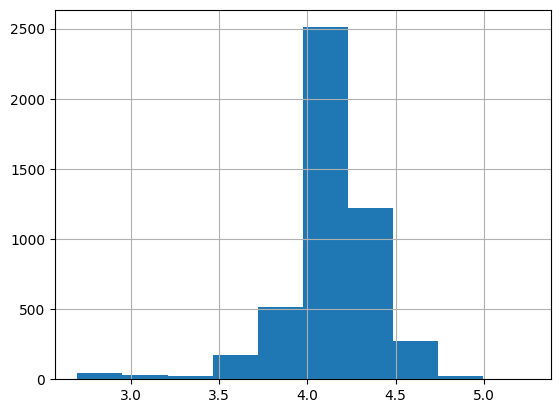

In [1283]:
df_bmw5['log_precio'].hist()

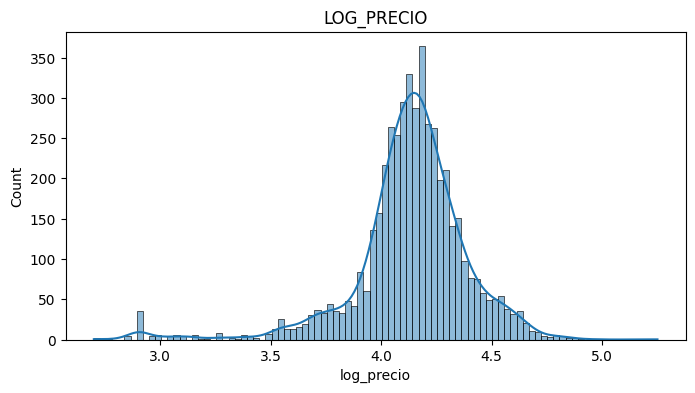

In [1284]:
y = df_bmw5['log_precio']

plt.figure(figsize=[8,4])
sns.histplot(y,kde=True)
plt.title('LOG_PRECIO')
plt.show()

# Aunque si que podemos ver un montón de outliers tenemos una distribución normal

## Análisis numericas

km y dias_antiguedad tienen correlación inversamente proporcional, lo cual tiene sentido, cuanto más antigüo es el coche, o más km tiene menor es el precio

potencia en cambio tiene una correlación proporcional. Cuanta más potencia mayor es el precio

In [1285]:
target = ['precio', 'log_precio']

In [1286]:
l_num2, l_bool2, l_cat2 = obtener_lista_variables(df_bmw5)

<Figure size 1200x1000 with 0 Axes>

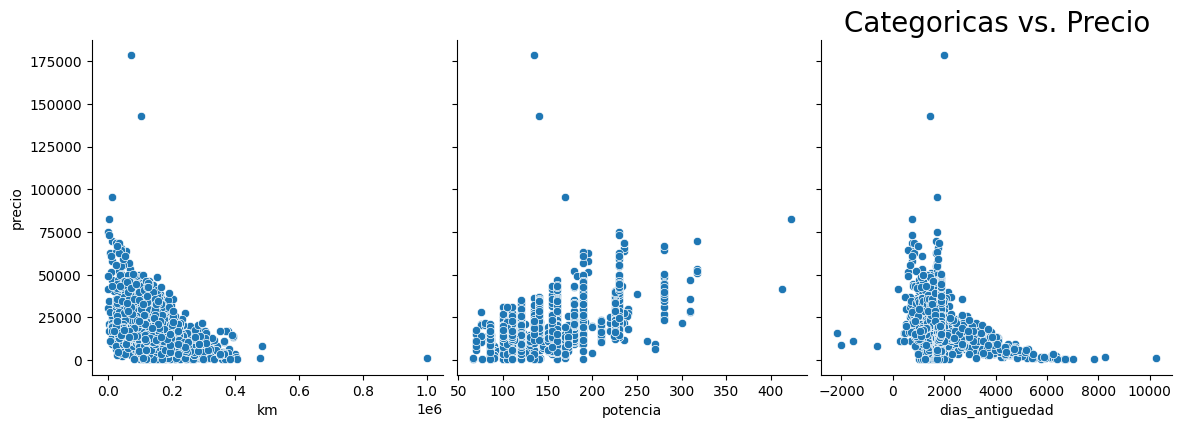

In [1287]:
plt.figure(figsize=(12, 10))
sns.pairplot(df_bmw5, x_vars=l_num2, y_vars='precio', height=4)
plt.title('Categoricas vs. Precio', fontsize=20)
plt.show()

## Análisis categóricas

<Figure size 1200x1000 with 0 Axes>

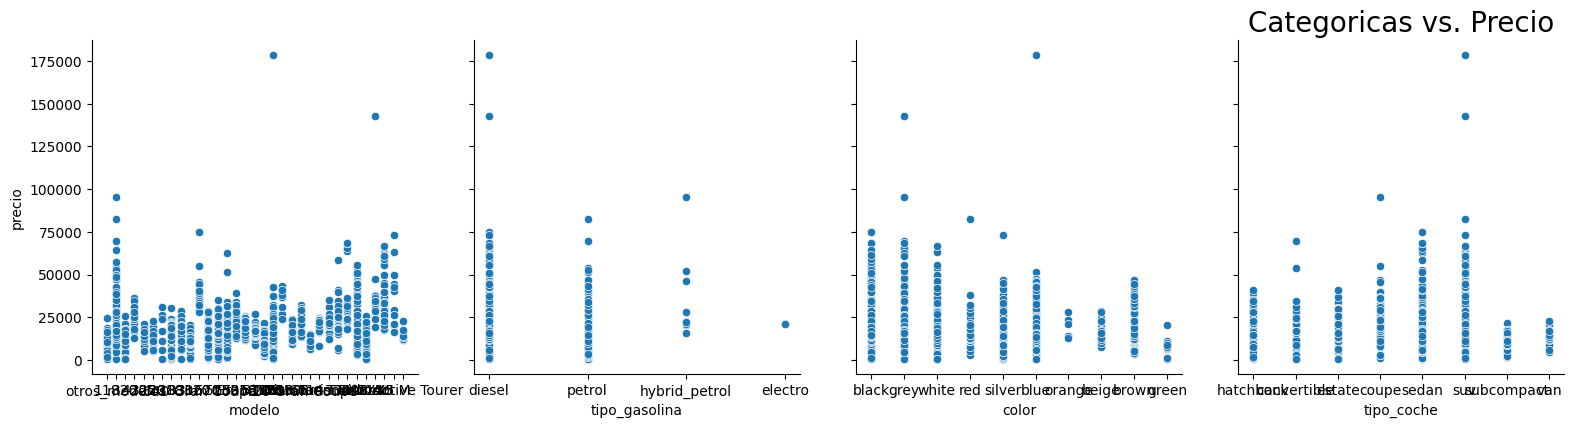

In [1288]:
plt.figure(figsize=(12, 10))
sns.pairplot(df_bmw5, x_vars=l_cat2, y_vars='precio', height=4)
plt.title('Categoricas vs. Precio', fontsize=20)
plt.show()

## Análisis boleanas

<Figure size 1200x1000 with 0 Axes>

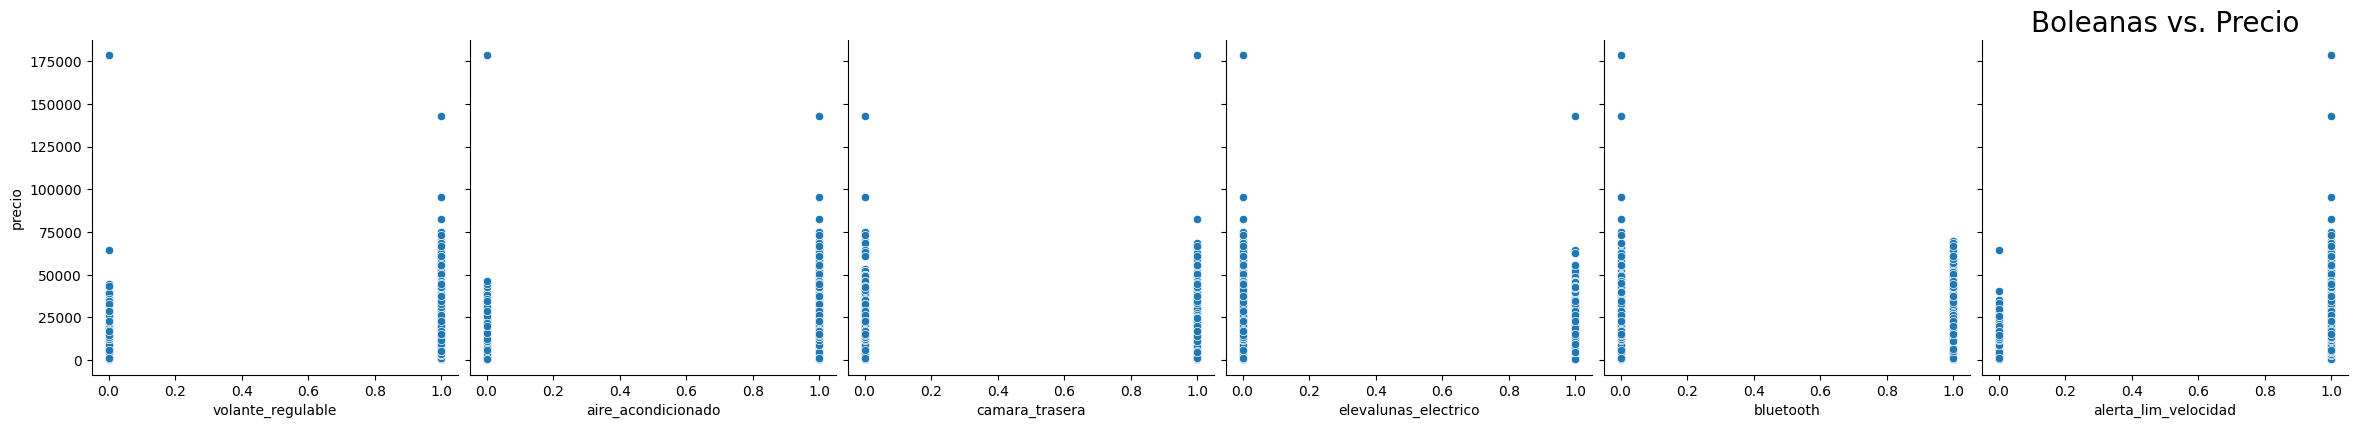

In [1289]:
plt.figure(figsize=(12, 10))
sns.pairplot(df_bmw5, x_vars=l_bool2, y_vars='precio', height=4)
plt.title('Boleanas vs. Precio', fontsize=20)
plt.show()

<Figure size 1200x1000 with 0 Axes>

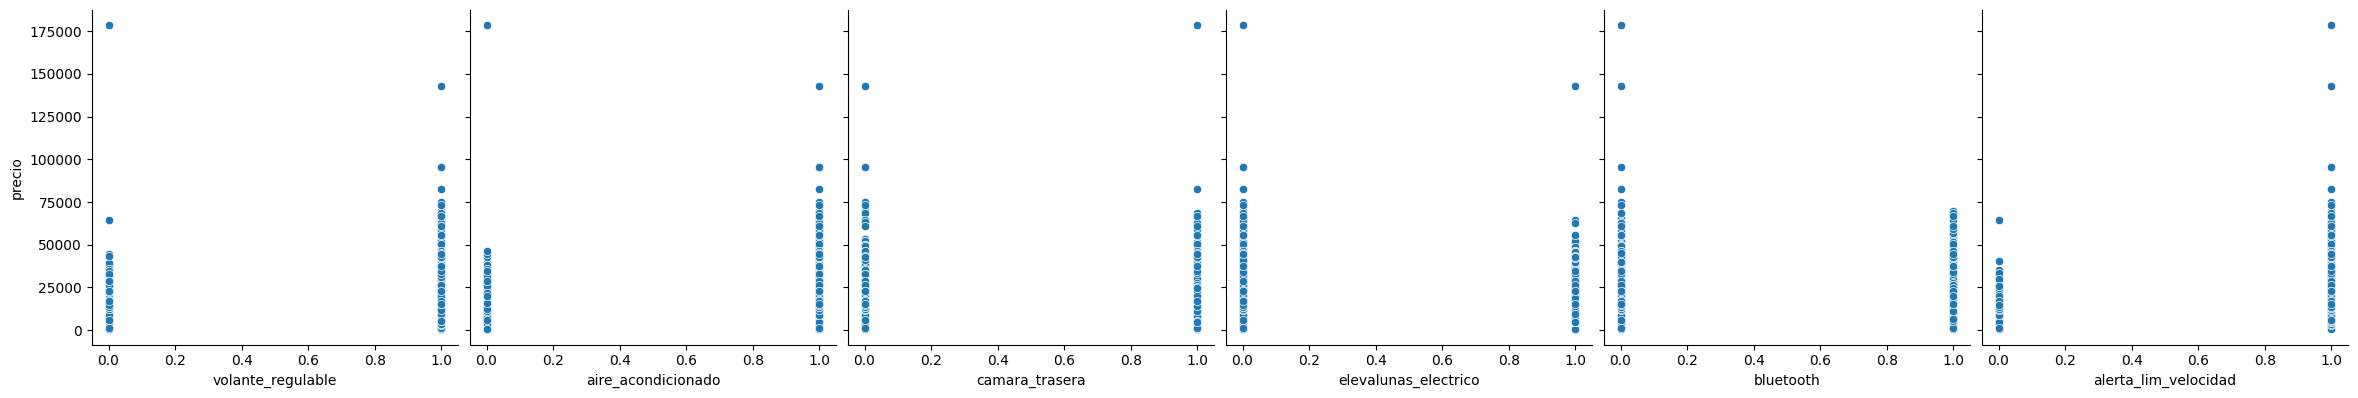

In [1290]:
plt.figure(figsize=(12, 10))
sns.pairplot(df_bmw5, x_vars=l_bool2, y_vars='precio', height=4)
plt.show()

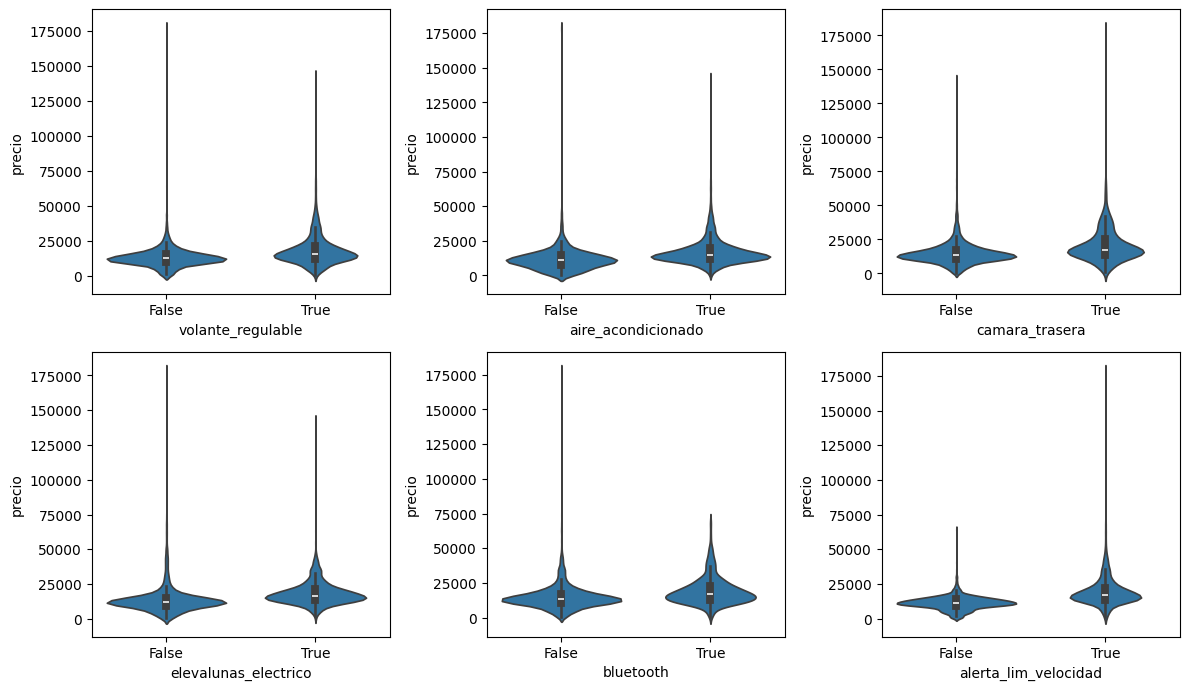

In [1291]:
plt.figure(figsize=(12, 10))

for col in l_bool2:
    plt.subplot(3, 3, l_bool2.index(col) + 1)  # 3 filas, 3 columnas
    sns.violinplot(x=df_bmw5[col], y=df_bmw5['precio'])

plt.tight_layout()  # evitar superposiciones
plt.show()

# Paso 6 de categóricas a numéricas

Transformación de categóricas a numéricas, ¿Qué variables vas a transformar? ¿Que técnica se va usar?

> *R: las variables categóricas que vamos a tranformar son: ['modelo', 'tipo_gasolina', 'color', 'tipo_coche'] con el método One hot encoding*



## Generar la lista de categóricas

In [1292]:
df_bmw6 = df_bmw5.copy()

In [1293]:
target = ['precio', 'log_precio']

In [1294]:
l_num3, l_bool3, l_cat3 = obtener_lista_variables(df_bmw6)

In [1295]:
l_cat3

['modelo', 'tipo_gasolina', 'color', 'tipo_coche']

In [1296]:
for i in l_cat3:
  print(i, df_bmw6[i].unique(), '\n')

modelo ['118' 'otros_modelos' '320' '420' '325' '120' '218' '318' '330' '316'
 '640 Gran Coupé' '520' '525' '530' '535' '320 Gran Turismo' '518' '116'
 'X3' 'M550' '318 Gran Turismo' '420 Gran Coupé' '114' '520 Gran Turismo'
 '530 Gran Turismo' '730' '740' 'X5' 'X1' 'X4' 'X6' 'X5 M'
 '218 Active Tourer'] 

tipo_gasolina ['diesel' 'petrol' 'hybrid_petrol' 'electro'] 

color ['black' 'grey' 'white' 'red' 'silver' 'blue' 'orange' 'beige' 'brown'
 'green'] 

tipo_coche ['hatchback' 'convertible' 'estate' 'coupe' 'sedan' 'suv' 'subcompact'
 'van'] 



## One hot encoding

In [1297]:
df_bmw6 = pd.get_dummies(data=df_bmw6, columns = l_cat2)

In [1298]:
df_bmw6.head()

,precio,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,dias_antiguedad,...,color_silver,color_white,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van
0,11300.0,140411.0,100.0,True,True,False,True,False,False,2161,...,0,0,0,0,0,1,0,0,0,0
1,69700.0,13929.0,317.0,True,True,False,False,True,True,1676,...,0,0,1,0,0,0,0,0,0,0
2,10200.0,183297.0,120.0,False,False,False,True,False,False,2132,...,0,1,0,0,1,0,0,0,0,0
3,25100.0,128035.0,135.0,True,True,False,True,True,True,1676,...,0,0,1,0,0,0,0,0,0,0
4,33400.0,97097.0,160.0,True,True,False,False,True,True,1735,...,1,0,0,1,0,0,0,0,0,0


# Paso 7 minmaxscaler

Escalar variables (usando minmaxscaler)


In [1299]:
df_bmw7 = df_bmw6.copy()

In [1300]:
minMaxResultado = MinMaxScaler()

In [1301]:
l_num3

['km', 'potencia', 'dias_antiguedad']

In [1302]:
df_bmw7[l_num3] = minMaxResultado.fit_transform(df_bmw7[l_num3])

In [1303]:
df_bmw7.head()

,precio,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,dias_antiguedad,...,color_silver,color_white,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van
0,11300.0,0.140413,0.095238,True,True,False,True,False,False,0.348015,...,0,0,0,0,0,1,0,0,0,0
1,69700.0,0.013987,0.703081,True,True,False,False,True,True,0.308962,...,0,0,1,0,0,0,0,0,0,0
2,10200.0,0.183280,0.151261,False,False,False,True,False,False,0.345680,...,0,1,0,0,1,0,0,0,0,0
3,25100.0,0.128043,0.193277,True,True,False,True,True,True,0.308962,...,0,0,1,0,0,0,0,0,0,0
4,33400.0,0.097118,0.263305,True,True,False,False,True,True,0.313713,...,1,0,0,1,0,0,0,0,0,0


#Paso 8 Elimino columnas con muy alta o muy poca correlación

In [1304]:
df_bmw8 = df_bmw7.copy()

## Alta correlación

In [1305]:
df_prueba = df_bmw8[['tipo_gasolina_diesel', 'tipo_gasolina_petrol']]

In [1306]:
# Mismo analisis, pero desde una funcion que nos facilita la vida
def highly_correlated(X, y, threshold):
    col_corr = list() # Set of all the names of deleted columns
    colnames = list()
    rownames = list()
    corr_matrix = df_bmw8.corr().abs()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colnames.append(corr_matrix.columns[i]) # getting the name of column
                rownames.append(corr_matrix.index[j])
                col_corr.append(corr_matrix.iloc[i, j])
    Z = pd.DataFrame({'F1':colnames,
                      'F2':rownames,
                      'corr_F1_F2':col_corr,
                      'corr_F1_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in colnames],
                      'corr_F2_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in rownames]
                      })
    Z['to_delete'] = rownames
    Z['to_delete'][Z['corr_F1_target'] < Z['corr_F2_target']] = Z['F1'][Z['corr_F1_target'] < Z['corr_F2_target']]

    return Z

highly_corr = highly_correlated(df_bmw8,y,0.95)
highly_corr

# esta función nos devuelve dos variables con una correlación superior a 0.95
# además nos dice cual de las dos eliminar, aquella que está menos correlacionada con el target

<ipython-input-1306-13643de81f31>:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,F1,F2,corr_F1_F2,corr_F1_target,corr_F2_target,to_delete
0,tipo_gasolina_petrol,tipo_gasolina_diesel,0.970815,0.096124,0.079782,tipo_gasolina_diesel


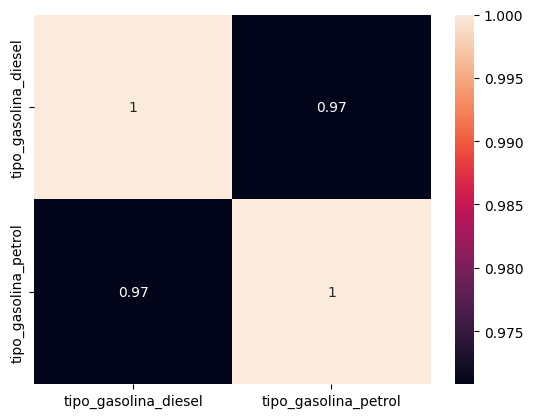

In [1307]:
# Compruebo que sea verdad
sns.heatmap(df_prueba.corr().abs(),annot=True)
plt.show()

In [1308]:
# Eliminamos las columnas altamente correlacionadas y nos quedamos con la que tenga mayor correlación con el target
drop_cols = list(highly_corr['to_delete'])
df_bmw8.drop(columns=drop_cols, inplace=True)
print('Eliminadas columnas altamente correlacionadas:', drop_cols)

Eliminadas columnas altamente correlacionadas: ['tipo_gasolina_diesel']


##Baja varianza

In [1309]:
def features_con_baja_correlacion(df, target_column, threshold=0.01):
    correlaciones = df.corr().abs()[target_column]  # Calcula la matriz de correlación entre las características y el precio
    features_con_baja_corr = correlaciones[correlaciones < threshold].index.tolist()     # Filtra las características con correlación menor al umbral

    return features_con_baja_corr


features_baja_correlacion = features_con_baja_correlacion(df_bmw8, target_column='precio', threshold=0.01)
print(features_baja_correlacion)

['modelo_218 Active Tourer', 'modelo_330', 'modelo_518', 'modelo_520', 'modelo_525', 'color_beige', 'color_brown', 'color_red', 'tipo_coche_van']


In [1310]:
drop_cols = list(features_baja_correlacion)
df_bmw8.drop(columns=drop_cols, inplace=True)
print('Eliminadas columnas altamente correlacionadas:', drop_cols)

Eliminadas columnas altamente correlacionadas: ['modelo_218 Active Tourer', 'modelo_330', 'modelo_518', 'modelo_520', 'modelo_525', 'color_beige', 'color_brown', 'color_red', 'tipo_coche_van']


# Paso 9 Correlación final
Luego aplicar la correlación final de variables ¿Hay alguna variable finalmente correlacionada?

> Las 3 variables más correlacionadas con el precio son:
1. Potencia: 0.641031
2. alerta_lim_velocidad:	0.434407
3. km:	0.407851


In [1325]:
# De más corrlacionado con el precio a menos
corr = df_bmw8.corr().abs()["precio"].sort_values(ascending=False).to_frame()
corr.style.background_gradient(cmap='Oranges')

,precio
precio,1.000000
log_precio,0.834831
potencia,0.641031
alerta_lim_velocidad,0.434407
km,0.407851
modelo_X5,0.358364
tipo_coche_suv,0.323926
dias_antiguedad,0.298191
volante_regulable,0.266418
elevalunas_electrico,0.260204


In [1311]:
corr = df_bmw8.corr(numeric_only = True)
corr.style.background_gradient(cmap='Oranges')

,precio,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,dias_antiguedad,log_precio,modelo_114,modelo_116,modelo_118,modelo_120,modelo_218,modelo_316,modelo_318,modelo_318 Gran Turismo,modelo_320,modelo_320 Gran Turismo,modelo_325,modelo_420,modelo_420 Gran Coupé,modelo_520 Gran Turismo,modelo_530,modelo_530 Gran Turismo,modelo_535,modelo_640 Gran Coupé,modelo_730,modelo_740,modelo_M550,modelo_X1,modelo_X3,modelo_X4,modelo_X5,modelo_X5 M,modelo_X6,modelo_otros_modelos,tipo_gasolina_electro,tipo_gasolina_hybrid_petrol,tipo_gasolina_petrol,color_black,color_blue,color_green,color_grey,color_orange,color_silver,color_white,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv
precio,1.000000,-0.407851,0.641031,0.266418,0.222924,0.251215,0.260204,0.198583,0.434407,-0.298191,0.834831,-0.028395,-0.190661,-0.118507,-0.032672,0.017625,-0.132686,-0.191614,-0.015986,-0.172147,0.025144,-0.012755,0.083428,0.077161,0.032359,0.078723,0.033601,0.083972,0.158579,0.071197,0.145739,0.103318,-0.085117,0.080226,0.192285,0.358364,0.141722,0.193923,0.179743,0.013802,0.096184,-0.027572,0.014922,-0.017307,-0.052494,-0.014107,0.011463,-0.025941,0.051733,0.013084,0.119906,-0.214992,-0.122056,0.019051,-0.085177,0.323926
km,-0.407851,1.000000,-0.047608,0.070291,0.021879,0.001004,0.046838,-0.033795,-0.020723,0.334932,-0.443141,-0.062405,-0.108185,-0.011317,-0.009430,-0.073908,0.001412,0.063243,0.007655,0.100735,-0.017952,-0.015662,-0.089600,-0.081902,-0.002904,0.071559,0.049150,0.027161,-0.027549,0.014510,-0.014503,0.000363,-0.058119,-0.034144,-0.097181,-0.036246,-0.024657,-0.025926,-0.129810,-0.037560,-0.034905,-0.040305,0.037959,-0.026450,0.042207,0.028526,-0.030606,0.023531,-0.066945,-0.057805,-0.075767,0.183504,-0.108036,0.061795,-0.029818,-0.111404
potencia,0.641031,-0.047608,1.000000,0.326451,0.180576,0.313483,0.341700,0.227282,0.507166,-0.056946,0.532524,-0.082517,-0.318993,-0.115935,0.007004,-0.029917,-0.255351,-0.261099,-0.099899,-0.034355,0.013537,0.046068,0.007324,0.008633,-0.004652,0.269762,0.087459,0.250984,0.163063,0.103356,0.160009,0.193688,-0.118265,0.043220,0.062503,0.345658,0.095753,0.207085,0.265951,-0.024030,0.050677,0.124983,0.025005,0.001656,-0.016734,-0.003178,0.011369,0.012121,0.007845,0.030810,0.139258,-0.058186,-0.232500,0.035075,-0.134736,0.235892
volante_regulable,0.266418,0.070291,0.326451,1.000000,0.285167,0.254584,0.277572,0.132497,0.244686,0.054570,0.252188,-0.061858,-0.193692,-0.119854,-0.037919,-0.038574,-0.130116,-0.098149,-0.045816,-0.098487,-0.014372,0.023523,0.010268,0.029449,0.056467,0.099892,0.034768,0.062891,0.056798,0.069906,0.055278,0.028370,-0.098910,0.055618,0.058602,0.144000,0.053715,0.082275,0.048940,0.005812,0.016325,-0.009805,0.006832,0.016232,0.009986,0.048624,0.008221,-0.015317,-0.102104,0.034997,0.037332,0.012381,-0.168690,0.050631,-0.091173,0.101408
aire_acondicionado,0.222924,0.021879,0.180576,0.285167,1.000000,0.141557,0.257499,0.102793,0.205339,-0.132651,0.314037,-0.069538,-0.153781,-0.103027,-0.039594,-0.019223,-0.033191,0.011427,0.029965,-0.046771,0.001943,-0.012819,-0.023227,0.019970,0.032891,0.069072,0.020309,0.046627,0.021342,0.039439,0.029082,0.023731,-0.109872,-0.008431,0.019106,0.074004,0.028260,0.039966,0.001921,0.011854,0.006221,-0.083968,0.005541,0.003524,-0.024082,0.031922,0.001593,-0.037345,-0.051400,-0.046699,-0.038630,0.090436,-0.119743,0.064276,-0.110204,-0.007727
camara_trasera,0.251215,0.001004,0.313483,0.254584,0.141557,1.000000,0.198838,0.133138,0.196620,0.024851,0.206423,-0.018807,-0.102698,-0.036112,-0.007589,-0.014742,-0.084062,-0.099377,-0.024192,-0.069170,0.009606,-0.015126,-0.031202,0.027210,0.055192,0.076631,0.062431,0.083557,0.067356,0.096156,0.079378,0.047486,-0.027429,0.021277,-0.001499,0.143693,0.065994,0.093044,0.049804,-0.012545,-0.007799,0.016190,0.000549,0.006396,0.011285,0.011347,-0.017747,0.001049,0.002299,-0.039632,0.01

#Paso 10 Excel

In [1312]:
df_bmw8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4822 entries, 0 to 4842
Data columns (total 56 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   precio                       4822 non-null   float64
 1   km                           4822 non-null   float64
 2   potencia                     4822 non-null   float64
 3   volante_regulable            4822 non-null   bool   
 4   aire_acondicionado           4822 non-null   bool   
 5   camara_trasera               4822 non-null   bool   
 6   elevalunas_electrico         4822 non-null   bool   
 7   bluetooth                    4822 non-null   bool   
 8   alerta_lim_velocidad         4822 non-null   bool   
 9   dias_antiguedad              4822 non-null   float64
 10  log_precio                   4822 non-null   float64
 11  modelo_114                   4822 non-null   uint8  
 12  modelo_116                   4822 non-null   uint8  
 13  modelo_118        

In [1313]:
df_50filas = df_bmw8.loc[:49,:]

In [1314]:
#Pasar a excel las primeras 50 filas
df_50filas.to_excel('/content/drive/MyDrive/Nuclio/M3. Data Analytics y Business Intelligence/Entregable 1/bmw_final.xlsx')